<h1 align="center">
  <a href="https://portkey.ai">
    <img width="300" src="https://analyticsindiamag.com/wp-content/uploads/2023/08/Logo-on-white-background.png" alt="portkey">
  </a>
</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11FexuOKWtc-0lvlxNt7L4gvIDYli8MdP?usp=sharing)

# Portkey + Segmind

[Portkey](https://app.portkey.ai/) is the Control Panel for AI apps. With it's popular AI Gateway and Observability Suite, hundreds of teams ship reliable, cost-efficient, and fast apps.

With Portkey, you can

 - Connect to 150+ models through a unified API,
 - View 40+ metrics & logs for all requests,
 - Enable semantic cache to reduce latency & costs,
 - Implement automatic retries & fallbacks for failed requests,
 - Add custom tags to requests for better tracking and analysis and more.

**Segmind** provides serverless APIs for hundreds of [generative models](https://www.segmind.com/models) that can be applied to a specific task that your application wants to accomplish. You can grab the APIs from the model page to get started with integrating them with your app. Before you can start making API calls, you will need an API key to authenticate your application.

#### Display Image ( Utility function )

In [ ]:
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image):
  # Assuming your data is stored in a variable named `response_data`
  response_data = image.data
  print(response_data)

  # Extract the base64-encoded image data  (This if condition is only if we fallback to Dall-E as dall e doesn't provide b64_json instead it gives the direct url)
  if (response_data[0].url):
    print(response_data[0].url)
  else:
    b64_image_data = response_data[0].b64_json

    # Decode the base64-encoded image data
    image_data = base64.b64decode(b64_image_data)

    # Convert the decoded image data into a PIL image object
    image = Image.open(io.BytesIO(image_data))

    # Display the image using Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()


## Quickstart

Since Portkey is fully compatible with the OpenAI signature, you can connect to the Portkey AI Gateway through OpenAI Client.

- Set the `base_url` as `PORTKEY_GATEWAY_URL`
- Add `default_headers` to consume the headers needed by Portkey using the `createHeaders` helper method.

You will need Portkey and Segmind API keys to run this notebook.

- Sign up for Portkey and generate your API key [here](https://app.portkey.ai/).
- Get your Segmind key [here](https://cloud.segmind.com/console/api-keys)


## With OpenAI Client

In [ ]:
!pip install -qU portkey-ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

client = OpenAI(
    api_key=userdata.get('SEGMIND_API_KEY'),  # replace with your Segmind API key
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        provider="segmind",
        api_key=userdata.get('PORTKEY_API_KEY')  # replace with your Portkey API key
    )
)


In [ ]:
# There's an 'images' endpoint provided by the Portkey AI library
image = client.images.generate(
    prompt="A stunning landscape with a mountain range and a lake",
    model="sdxl1.0-newreality-lightning"  # replace with the actual model name
)

display_image(image)

Output hidden; open in https://colab.research.google.com to view.

# With Portkey Client

In [ ]:
from portkey_ai import Portkey

portkey = Portkey(
    api_key= userdata.get('PORTKEY_API_KEY'),
    virtual_key= "segmind-e63290"
)

In [ ]:
image = portkey.images.generate(
  model="sdxl1.0-newreality-lightning",
  prompt="Humans and Robots in parallel universe",
  size="1024x1024"
)

display_image(image)

## `Optional` Advanced Routing - Fallbacks

The Fallback feature allows you to specify a list of providers/models in a prioritized order. If the primary LLM fails to respond or encounters an error, Portkey will automatically fallback to the next LLM in the list, ensuring your application's robustness and reliability.

To enable fallbacks, you can modify the [config object](https://docs.portkey.ai/docs/api-reference/config-object) to include the fallback mode.

Note: You can create and store custom configurations on [Portkey](https://app.portkey.ai/).

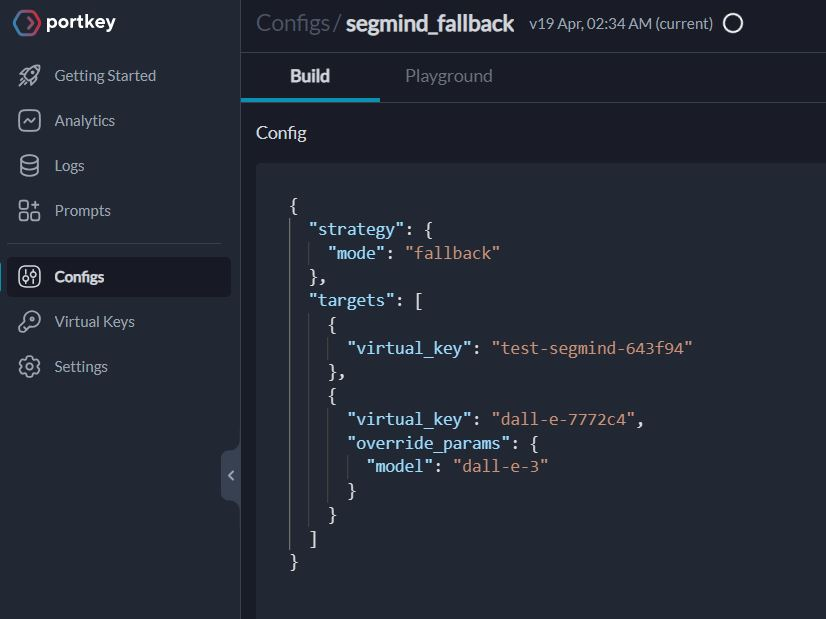

In [ ]:
from portkey_ai import Portkey

portkey = Portkey(
    api_key= userdata.get('PORTKEY_API_KEY'),
    # Fallback to Dall-E  (If segmind fails)
    config="pc-segmin-ab3d5d", # Config key, Generated when you create a config
    virtual_key= "test-segmind-643f94"
)

In [ ]:
image = portkey.images.generate(
  model="sdxl1.0-newreality-lightning",
  prompt="Humans and Robots in parallel universe",
  size="1024x1024"
)

display_image(image)

Output hidden; open in https://colab.research.google.com to view.

## Monitoring your Requests

### Using Portkey you can monitor your Segmind requests and track tokens, cost, latency, and more.


![](https://portkey.ai/blog/content/images/2024/04/logs.gif)